## importing neccessary liberaries

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [58]:
dataset = pd.read_excel("/content/WAR only my dataset.xlsx")

### EDA- Exploratory data analysis

In [59]:
dataset.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,25,7,0.1,1,50,40,14.2
1,25,7,0.2,1,50,40,16.8
2,25,7,0.3,1,50,40,21.0
3,25,7,0.4,1,50,40,25.8
4,25,7,0.5,1,50,40,34.2


In [60]:
# independent and target variables
X = dataset.drop('Water Absorption reduction (%)', axis = 1)
y = dataset['Water Absorption reduction (%)']

In [61]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform (X)
X=pd.DataFrame(X,columns=['Temprature(℃)','PH', 'CaCl₂ (mol/L)', 'Soaking Time (days)', 'Converted Enzyme Conc (g/L)', 'Urea Conc (g/L)	'])
X

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t
0,0.0,0.0,-1.549193,0.0,0.0,0.0
1,0.0,0.0,-1.161895,0.0,0.0,0.0
2,0.0,0.0,-0.774597,0.0,0.0,0.0
3,0.0,0.0,-0.387298,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.387298,0.0,0.0,0.0
6,0.0,0.0,0.774597,0.0,0.0,0.0
7,0.0,0.0,1.161895,0.0,0.0,0.0
8,0.0,0.0,1.549193,0.0,0.0,0.0


In [62]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (6, 6)
Testing set size: (2, 6)
Validation set size: (1, 6)


In [63]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [64]:
Ada = AdaBoostRegressor(random_state=0)
Ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [65]:
Ada.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 0}

In [66]:
y_pred_train = Ada.predict(X_train)
y_pred_test = Ada.predict(X_test)
y_pred_val=Ada.predict(X_val)

In [67]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, Ada.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, Ada.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, Ada.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, Ada.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, Ada.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, Ada.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, Ada.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, Ada.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, Ada.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, Ada.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, Ada.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, Ada.predict(X_val)):.4f}')


Training Set Metrics:
The RMSE on the training dataset is: 0.0408
The MSE on the training dataset is: 0.0017
The MAE on the training daset is: 0.0167
The r2_score on the training dataset is: 1.0000
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 2.9155
The MSE on the testing dataset is: 8.5000
The MAE on the testing dataset is: 2.9000
The r2_score on the testing dataset is: 0.9368
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 4.2000
The MSE on the validation dataset is: 17.6400
The MAE on the validation dataset is: 4.2000
The r2_score on the validation dataset is: nan


### Hyperparameter Tunning (Optimization)]

In [68]:
# Define hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [69]:
# Perform GridSearchCV to find the best parameters
Ada_grid = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=0),
    param_grid=params,
    cv=2,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)


In [70]:
# Define hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, 30, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV to find the best parameters
Ada_grid = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=0, estimator=tree.DecisionTreeRegressor(random_state=0)), # Specify the base estimator
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)
Ada_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [10, 20, 30, None],
                         'estimator__max_features': ['sqrt', 'log2'],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [71]:
# Print the best parameters
print("Best Parameters from Grid Search:", Ada_grid.best_params_)

Best Parameters from Grid Search: {'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'n_estimators': 100}


In [72]:
best_Ada = Ada_grid.best_estimator_


In [73]:
y_pred_train = Ada_grid.predict(X_train)
y_pred_test = Ada_grid.predict(X_test)
y_pred_val=Ada_grid.predict(X_val)

In [74]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, Ada_grid.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, Ada_grid.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, Ada_grid.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, Ada_grid.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, Ada_grid.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, Ada_grid.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, Ada_grid.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, Ada_grid.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, Ada_grid.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, Ada_grid.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, Ada_grid.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, Ada_grid.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 0.0408
The MSE on the training dataset is: 0.0017
The MAE on the training daset is: 0.0167
The r2_score on the training dataset is: 1.0000
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 2.9155
The MSE on the testing dataset is: 8.5000
The MAE on the testing dataset is: 2.9000
The r2_score on the testing dataset is: 0.9368
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 4.2000
The MSE on the validation dataset is: 17.6400
The MAE on the validation dataset is: 4.2000
The r2_score on the validation dataset is: nan


### Actual vs Predicted Capacity

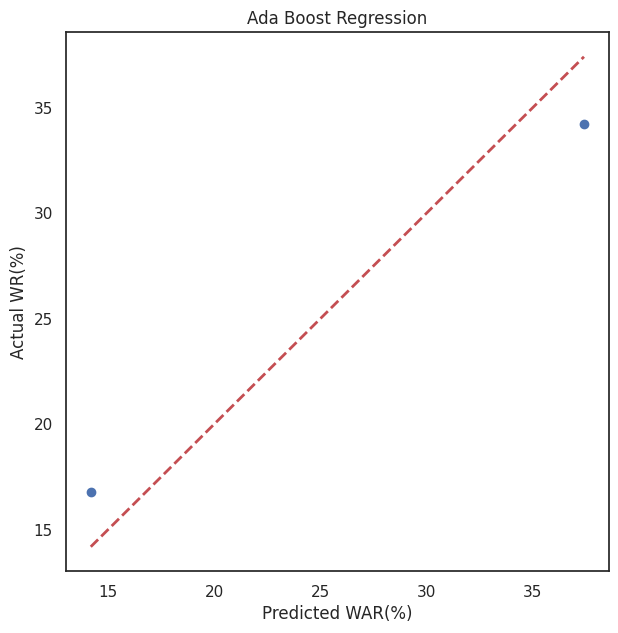

In [75]:
y_predict =best_Ada.predict(X_test)
plt.figure(figsize=(7,7))
sns.set_style('white')
plt.title('Ada Boost Regression')
plt.xlabel("Predicted WAR(%)")
plt.ylabel("Actual WR(%)")
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [76]:
best_Ada.feature_importances_

array([0.        , 0.        , 0.99359267, 0.        , 0.        ,
       0.        ])

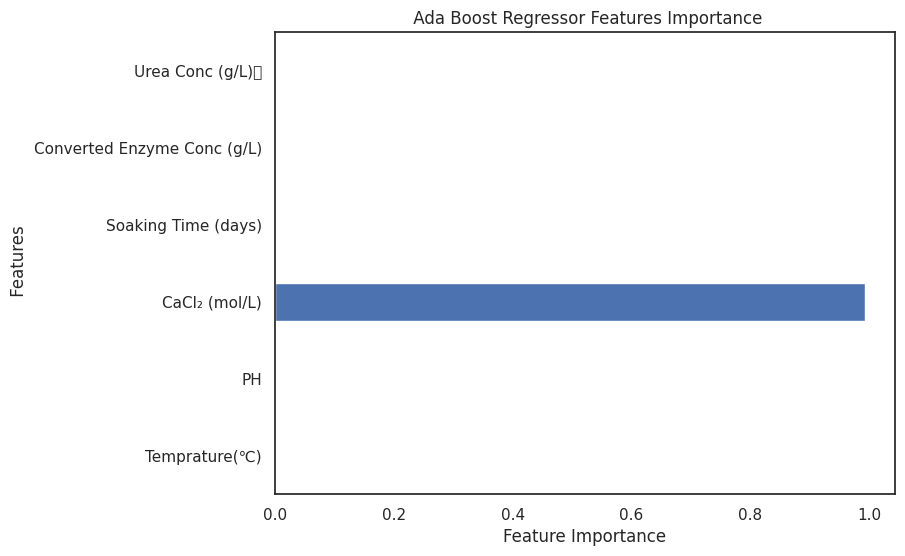

In [77]:
importances = pd.Series(best_Ada.feature_importances_ , index=X.columns)
sns.set_style('white')
importances.plot(kind = 'barh', figsize=(8,6))
plt.xlabel("Feature Importance")
plt.ylabel(" Features")
plt.title(" Ada Boost Regressor Features Importance")
plt.show()

In [78]:
new_data = pd.DataFrame({
    'Temprature(℃)': [25, 25, 25, 25, 25, 25, 25, 25, 25],
    'PH': [7, 7, 7, 7, 7, 7, 7, 7, 7],
    'CaCl₂ (mol/L)': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'Soaking Time (days)': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Converted Enzyme Conc (g/L)': [50, 50, 50, 50, 50, 50, 50, 50, 50],
    'Urea Conc (g/L)\t': [40,40, 40, 40, 40, 40, 40, 40, 40],
    'Water Absorption reduction (%)': [14.2,16.8, 21, 25.8, 34.2, 37.4, 37.3, 37.36, 36.5]
})
display(new_data)

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t,Water Absorption reduction (%)
0,25,7,0.1,1,50,40,14.20
1,25,7,0.2,1,50,40,16.80
2,25,7,0.3,1,50,40,21.00
3,25,7,0.4,1,50,40,25.80
4,25,7,0.5,1,50,40,34.20
5,25,7,0.6,1,50,40,37.40
6,25,7,0.7,1,50,40,37.30
7,25,7,0.8,1,50,40,37.36
8,25,7,0.9,1,50,40,36.50


In [79]:
# Drop the target column from new_data before making predictions
new_predictions = best_Ada.predict(new_data.drop('Water Absorption reduction (%)', axis=1))

In [80]:
new_data['Predicted Water Absorption reduction (%)'] = new_predictions
display(new_data)

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t,Water Absorption reduction (%),Predicted Water Absorption reduction (%)
0,25,7,0.1,1,50,40,14.20,34.2
1,25,7,0.2,1,50,40,16.80,34.2
2,25,7,0.3,1,50,40,21.00,34.2
3,25,7,0.4,1,50,40,25.80,37.3
4,25,7,0.5,1,50,40,34.20,37.3
5,25,7,0.6,1,50,40,37.40,37.3
6,25,7,0.7,1,50,40,37.30,37.3
7,25,7,0.8,1,50,40,37.36,37.3
8,25,7,0.9,1,50,40,36.50,37.3


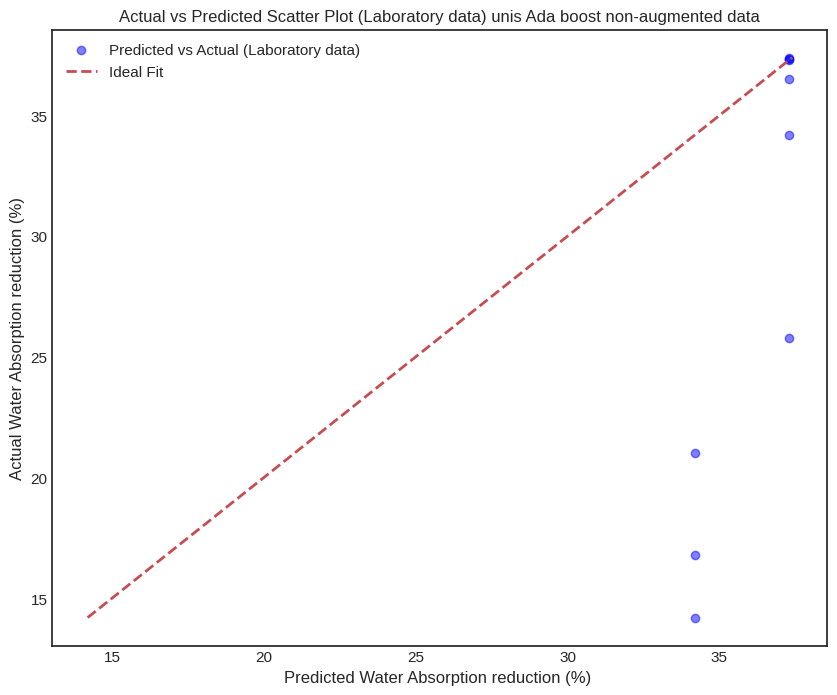

In [81]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-white')
plt.scatter(new_data['Predicted Water Absorption reduction (%)'], new_data['Water Absorption reduction (%)'], color="blue", alpha=0.5, label="Predicted vs Actual (Laboratory data)")
plt.plot([new_data['Water Absorption reduction (%)'].min(), new_data['Water Absorption reduction (%)'].max()],
         [new_data['Water Absorption reduction (%)'].min(), new_data['Water Absorption reduction (%)'].max()],
         'r--', lw=2, label="Ideal Fit")
plt.xlabel("Predicted Water Absorption reduction (%) ")
plt.ylabel("Actual Water Absorption reduction (%)")
plt.title("Actual vs Predicted Scatter Plot (Laboratory data) unis Ada boost non-augmented data")
plt.legend()
plt.show()